 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [166]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading in all data 

aaplpath = Path("Resources/aapl_historical.csv")
algopath = Path("Resources/algo_returns.csv")
costpath = Path("Resources/cost_historical.csv")
googpath = Path("Resources/goog_historical.csv")
sp500path = Path("Resources/sp500_history.csv")
whalepath = Path("Resources/whale_returns.csv")

aapldf = pd.read_csv(aaplpath, index_col="Trade DATE", parse_dates=True)
algodf = pd.read_csv(algopath, index_col="Date", parse_dates=True)
costdf = pd.read_csv(costpath, index_col="Trade DATE", parse_dates=True)
googdf = pd.read_csv(googpath, index_col="Trade DATE", parse_dates=True)
sp500df = pd.read_csv(sp500path, index_col="Date", parse_dates=True)
whaledf = pd.read_csv(whalepath, index_col="Date", parse_dates=True)

whaledf.head(20)

C:\Users\Jarom\AppData\Local\Temp\ipykernel_11292\2531110393.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500df = pd.read_csv(sp500path, index_col="Date", parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Drop nulls
whaledf.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [4]:
# Reading algorithmic returns
algodf.head(20)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [5]:
# Drop nulls
algodf.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [6]:
# Reading S&P 500 Closing Prices
sp500df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [7]:
# Check Data Types
print(sp500df.dtypes)

Close    object
dtype: object


In [8]:
# Fix Data Types
sp500df["Close"] = sp500df["Close"].str.strip("$")
sp500df["Close"] = sp500df["Close"].astype(float)
sp500df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [9]:
# Calculate Daily Returns, dropping nulls
sp500df = sp500df.pct_change().dropna()

In [10]:
# Rename `Close` Column to be specific to this portfolio.
sp500df.rename(columns={"Close": "S&P 500"}, inplace=True)
sp500df

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [25]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
fulldf = pd.concat([sp500df, algodf, whaledf], axis="columns", join="inner").dropna()
fulldf.sort_values(by="Date", ascending=True, inplace=True)
fulldf

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,0.004408,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.001195,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

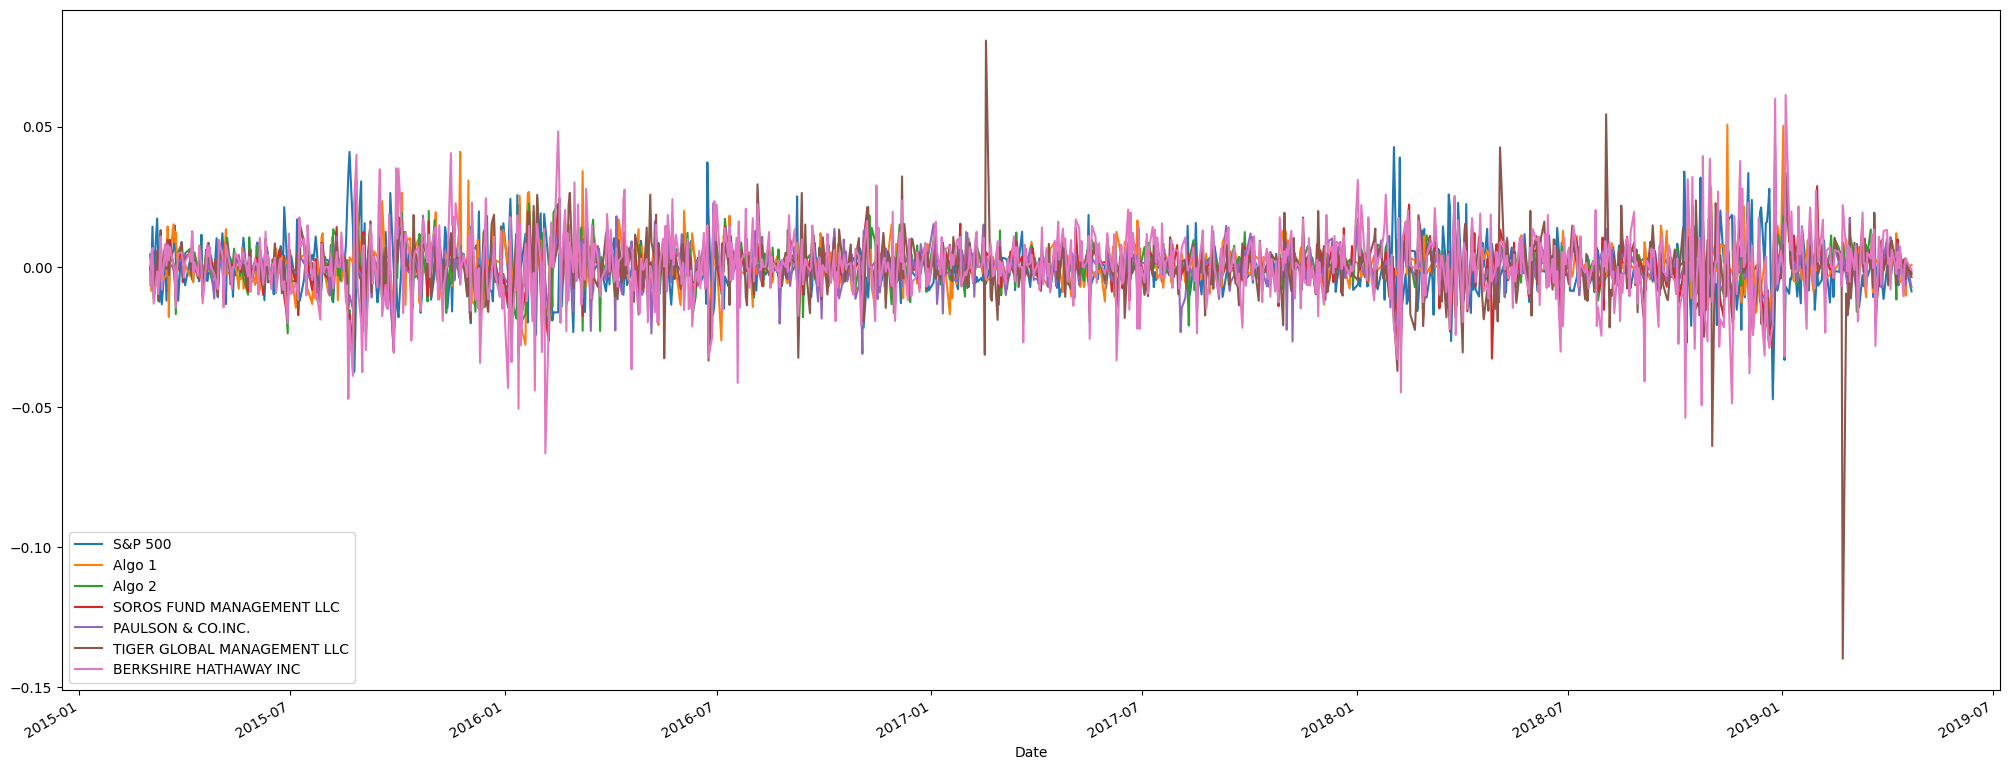

In [29]:
# Plot daily returns of all portfolios
fulldf.plot(figsize=(25,10))


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

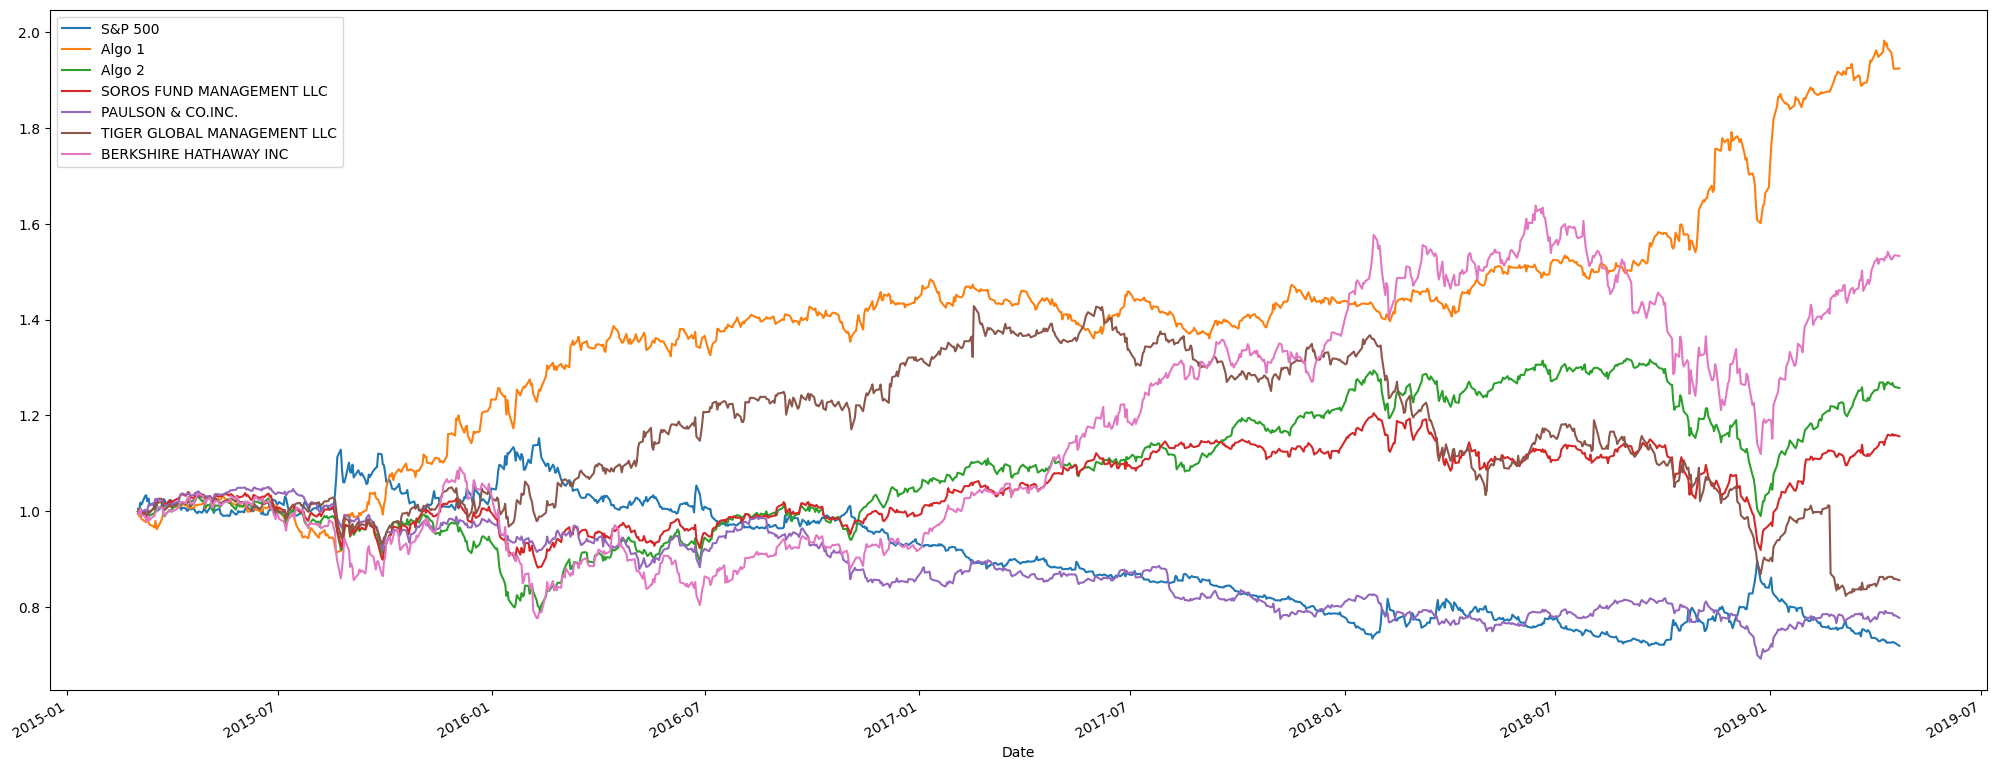

In [38]:
# Calculate cumulative returns of all portfolios
cumreturndf = (1+fulldf).cumprod() 
# Plot cumulative returns
cumreturndf.plot(figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

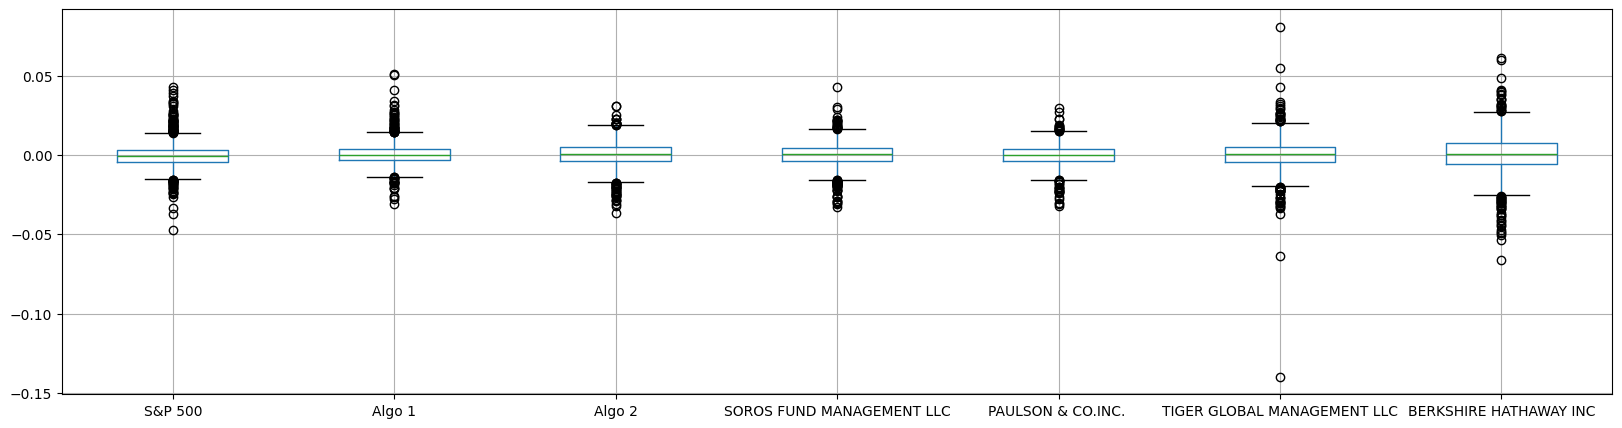

In [41]:
# Box plot to visually show risk
fulldf.boxplot(figsize=(20,5))

### Calculate Standard Deviations

In [45]:
# Calculate the daily standard deviations of all portfolios (percent)
devdf = fulldf.std()*100
devdf

S&P 500                        0.858689
Algo 1                         0.762269
Algo 2                         0.834123
SOROS FUND MANAGEMENT LLC      0.789619
PAULSON & CO.INC.              0.702552
TIGER GLOBAL MANAGEMENT LLC    1.089731
BERKSHIRE HATHAWAY INC         1.291875
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [51]:
# Determine which portfolios are riskier than the S&P 500
for x in devdf:
    if x > devdf["S&P 500"]:
        print(round(x, 4))

1.0897
1.2919


In [53]:
# Print out full display for those portfolios
print(f"TIGER GLOBAL MANAGEMENT LLC & BERKSHIRE HATHAWAY INC are more volatile than the S&P 500 with volatility 1.0897 & 1.2919 compared to 0.8586")

TIGER GLOBAL MANAGEMENT LLC & BERKSHIRE HATHAWAY INC are more volatile than the S&P 500 with volatility 1.0897 & 1.2919 compared to 0.8586


### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized standard deviation (252 trading days)
devdf * np.sqrt(252)

S&P 500                        13.631265
Algo 1                         12.100647
Algo 2                         13.241299
SOROS FUND MANAGEMENT LLC      12.534811
PAULSON & CO.INC.              11.152660
TIGER GLOBAL MANAGEMENT LLC    17.298936
BERKSHIRE HATHAWAY INC         20.507885
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

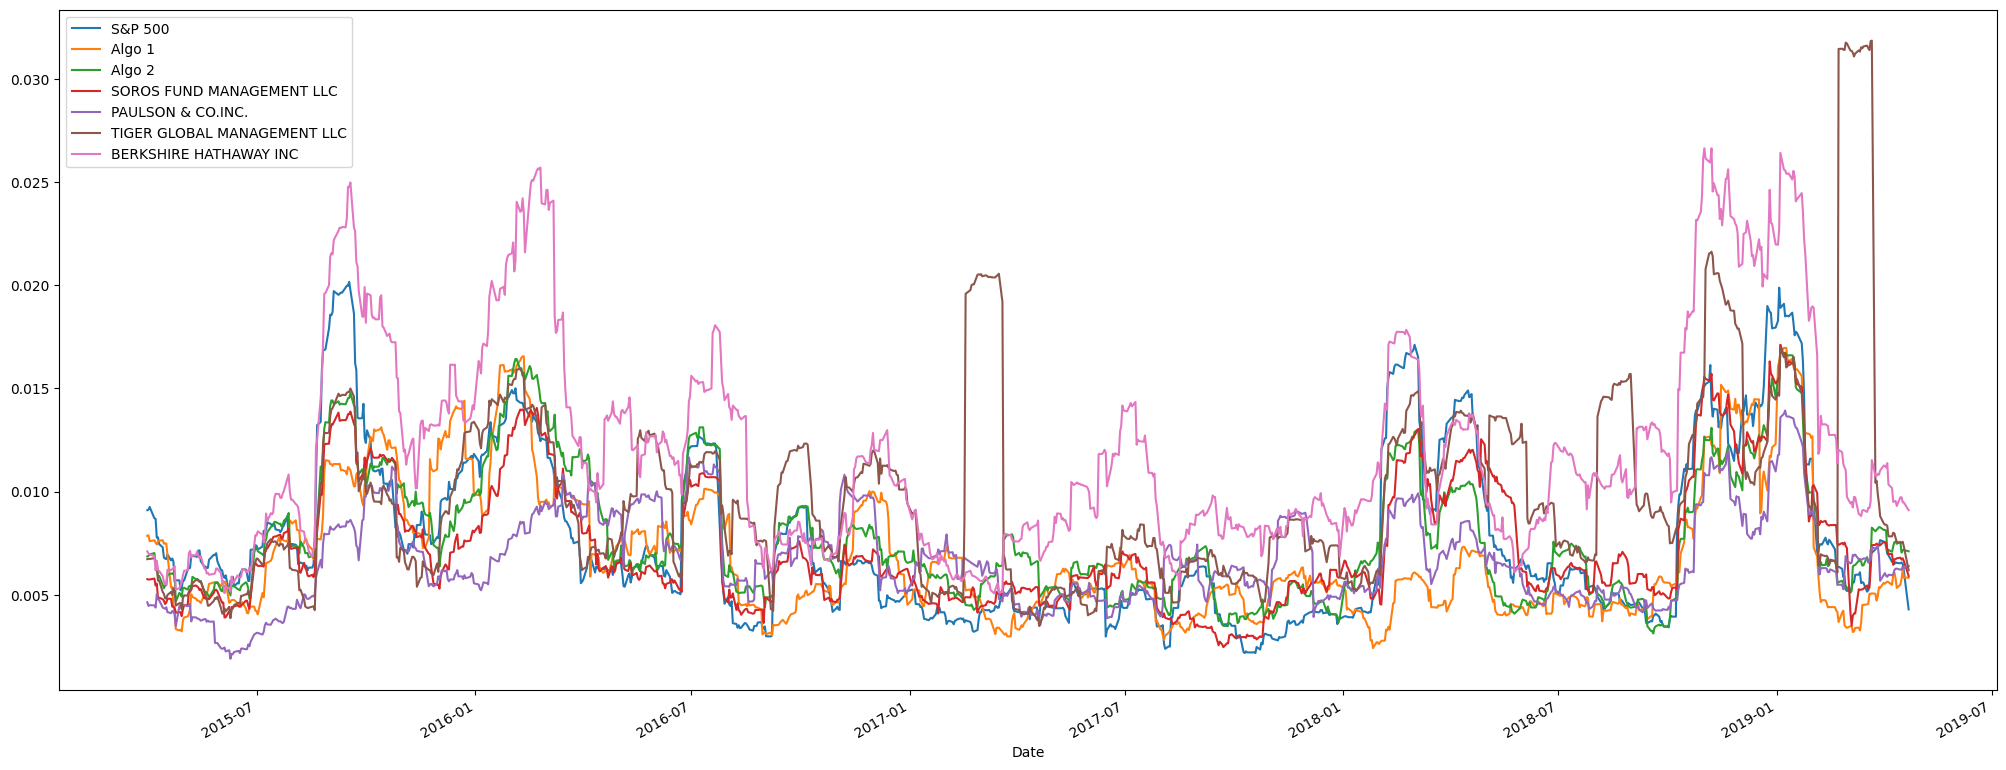

In [59]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolldf = fulldf.rolling(21).std().dropna()

# Plot the rolling standard deviation
rolldf.plot(figsize=(25,10))

### Calculate and plot the correlation

In [61]:
# Calculate the correlation
corrdf = fulldf.corr()
# Display the correlation matrix
corrdf

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P 500,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

7.373467552840442e-05


<Axes: >

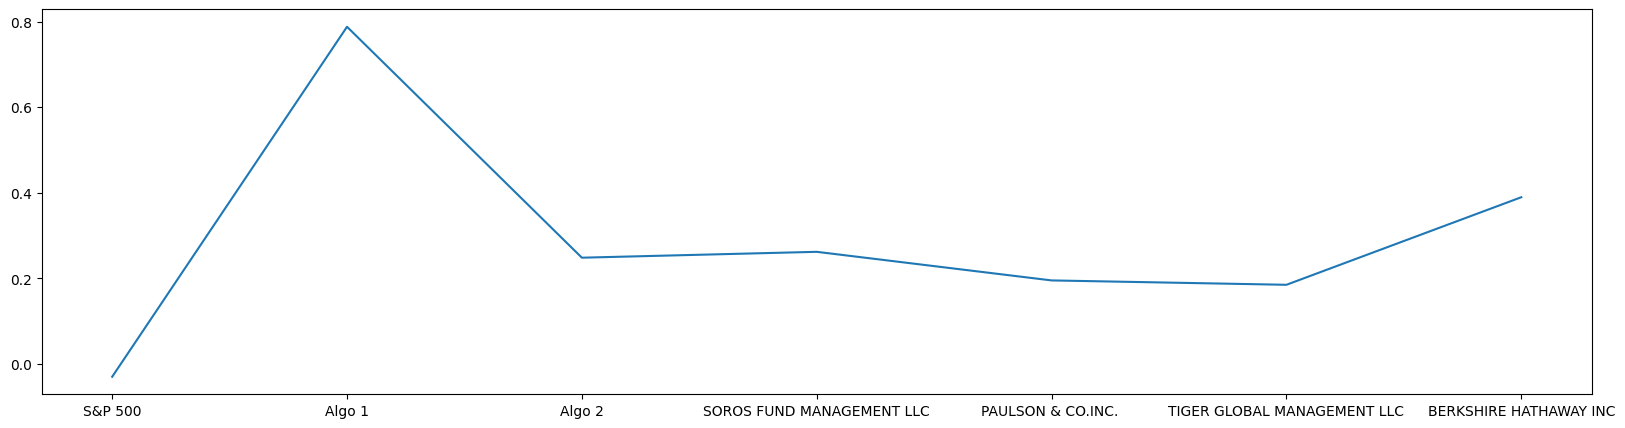

In [78]:
# Calculate covariance of a single portfolio
covdf = fulldf.cov()
#print(covdf)
# Calculate variance of S&P 500
vardf = fulldf["S&P 500"].var()
print(vardf)
# Computing beta
beta = covdf["Algo 1"]/vardf
# Plot beta trend
beta.plot(figsize=(20,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

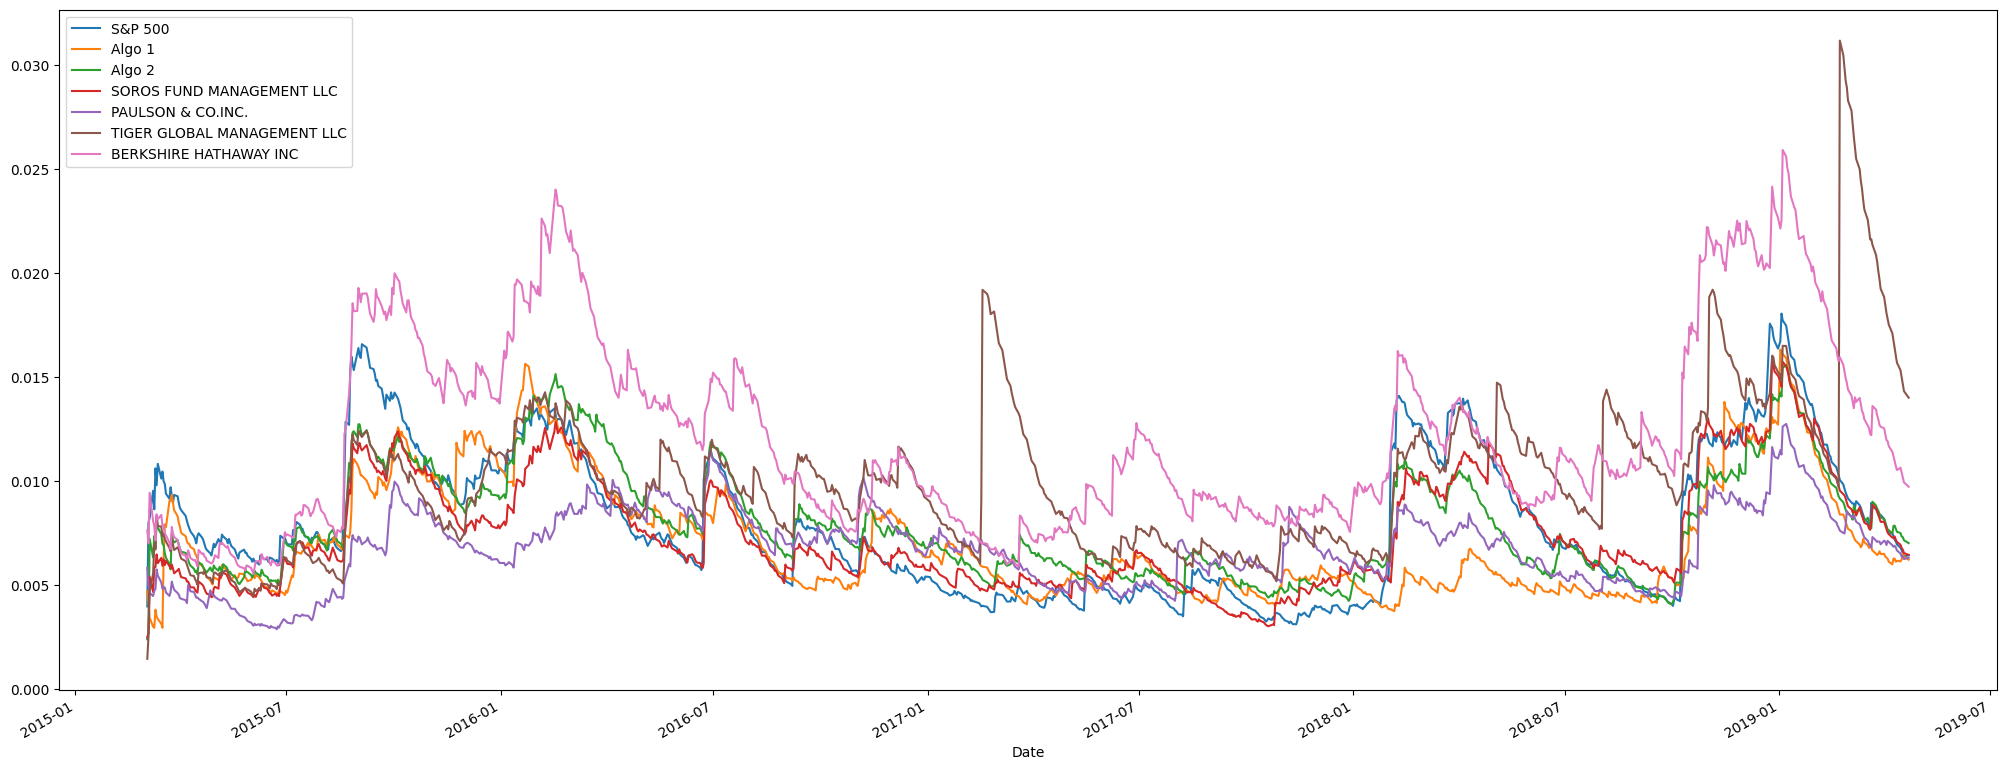

In [79]:
# Use `ewm` to calculate the rolling window
ewmdf = fulldf.ewm(21).std().dropna()
ewmdf.plot(figsize=(25,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [128]:
# Annualized Sharpe Ratios
rate = np.average([2.14, 1.84, 2.33, 2.91, 2.14])/100 # yearly averages of 10-year Treasury bonds from 2015-2019 via https://www.macrotrends.net/2016/10-year-treasury-bond-rate-yield-chart
ratios = pd.DataFrame(columns=["Sharpe Ratios"])
for x in fulldf:
    std = fulldf[x].std()* np.sqrt(252) # annualized volatility
    returns = fulldf[x].mean()* 252 # annualized excpected returns
    ratio = (returns-rate)/std # Sharpe ratio
    ratios.loc[x] = ratio
ratios


,Sharpe Ratios
S&P 500,-0.685258
Algo 1,1.181830
Algo 2,0.312750
SOROS FUND MANAGEMENT LLC,0.161638
PAULSON & CO.INC.,-0.695141
TIGER GLOBAL MANAGEMENT LLC,-0.261524
BERKSHIRE HATHAWAY INC,0.495956


<Axes: >

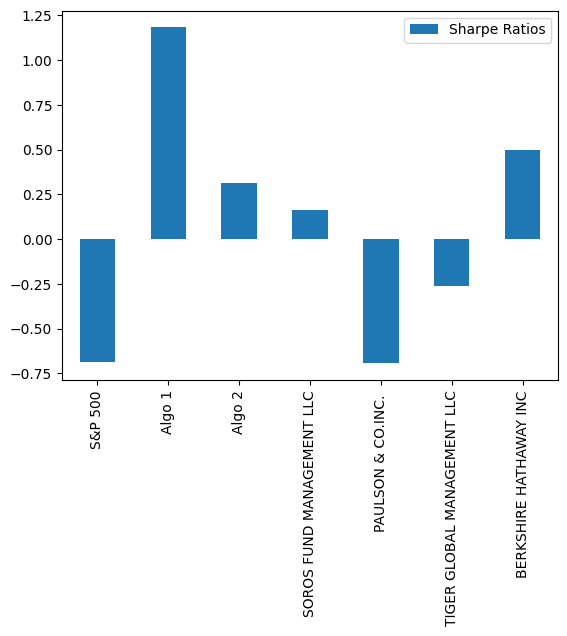

In [129]:
# Visualize the sharpe ratios as a bar plot
ratios.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on return outcome and Sharpe Ratio, Algo 1 seems to be ahead!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
I chose to go with 3 ETFs that represent some new technologies at the time (2015) and see if investing into those would have yielded good returns. The 3 techs are Lithium Batteries, Bitcoin, and Artificial Intelligence.

In [114]:
# Reading data from 1st stock, drop unneeded columns, add ticker to name
litpath = Path("Resources/LIT.csv")
litdf = pd.read_csv(litpath, index_col="Date", parse_dates=True)
litdf.drop(["Open","High","Low","Adj Close","Volume"], axis="columns", inplace=True)
litdf.rename(columns={"Close": "LIT"}, inplace=True)
litdf

,LIT
Date,
2015-03-02,24.020000
2015-03-03,23.920000
2015-03-04,23.900000
2015-03-05,23.879999
2015-03-06,23.719999
...,...
2019-04-24,28.030001
2019-04-25,27.719999
2019-04-26,27.799999


In [115]:
# Reading data from 2nd stock, drop unneeded columns, add ticker to name
gbtcpath = Path("Resources/GBTC.csv")
gbtcdf = pd.read_csv(gbtcpath, index_col="Date", parse_dates=True)
gbtcdf.drop(["Open","High","Low","Adj Close","Volume"], axis="columns", inplace=True)
gbtcdf.rename(columns={"Close": "GBTC"}, inplace=True)
gbtcdf

,GBTC
Date,
2015-05-12,0.548901
2015-05-13,0.538462
2015-05-14,0.494505
2015-05-15,0.417582
2015-05-18,0.298352
...,...
2019-05-22,10.170000
2019-05-23,9.990000
2019-05-24,10.700000


In [116]:
# Reading data from 3rd stock, drop unneeded columns, add ticker to name
robopath = Path("Resources/ROBO.csv")
robodf = pd.read_csv(robopath, index_col="Date", parse_dates=True)
robodf.drop(["Open","High","Low","Adj Close","Volume"], axis="columns", inplace=True)
robodf.rename(columns={"Close": "ROBO"}, inplace=True)
robodf

,ROBO
Date,
2015-03-02,26.400000
2015-03-03,26.150000
2015-03-04,26.049999
2015-03-05,26.048000
2015-03-06,25.790001
...,...
2019-05-22,37.230000
2019-05-23,36.279999
2019-05-24,36.570000


In [117]:
# Combine all stocks in a single DataFrame
etfdf = pd.concat([litdf, gbtcdf, robodf], axis="columns", join="inner").dropna()
etfdf.sort_values(by="Date", ascending=True, inplace=True)
etfdf

,LIT,GBTC,ROBO
Date,,,
2015-05-12,25.400000,0.548901,26.559999
2015-05-13,25.540001,0.538462,26.570000
2015-05-14,25.520000,0.494505,26.836000
2015-05-15,25.540001,0.417582,26.790001
2015-05-18,25.520000,0.298352,26.860001
...,...,...,...
2019-04-24,28.030001,6.790000,41.810001
2019-04-25,27.719999,6.980000,41.459999
2019-04-26,27.799999,6.280000,41.459999


In [127]:
# Calculate daily returns, drop NA
etfchange = etfdf.pct_change().dropna()
etfchange1 = (1+etfchange).cumprod()
etfchange1

,LIT,GBTC,ROBO
Date,,,
2015-05-13,1.005512,0.980982,1.000377
2015-05-14,1.004724,0.900900,1.010392
2015-05-15,1.005512,0.760760,1.008660
2015-05-18,1.004724,0.543544,1.011295
2015-05-19,0.999213,0.580580,1.008321
...,...,...,...
2019-04-24,1.103543,12.370172,1.574172
2019-04-25,1.091339,12.716319,1.560994
2019-04-26,1.094488,11.441043,1.560994


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<Axes: xlabel='Date'>

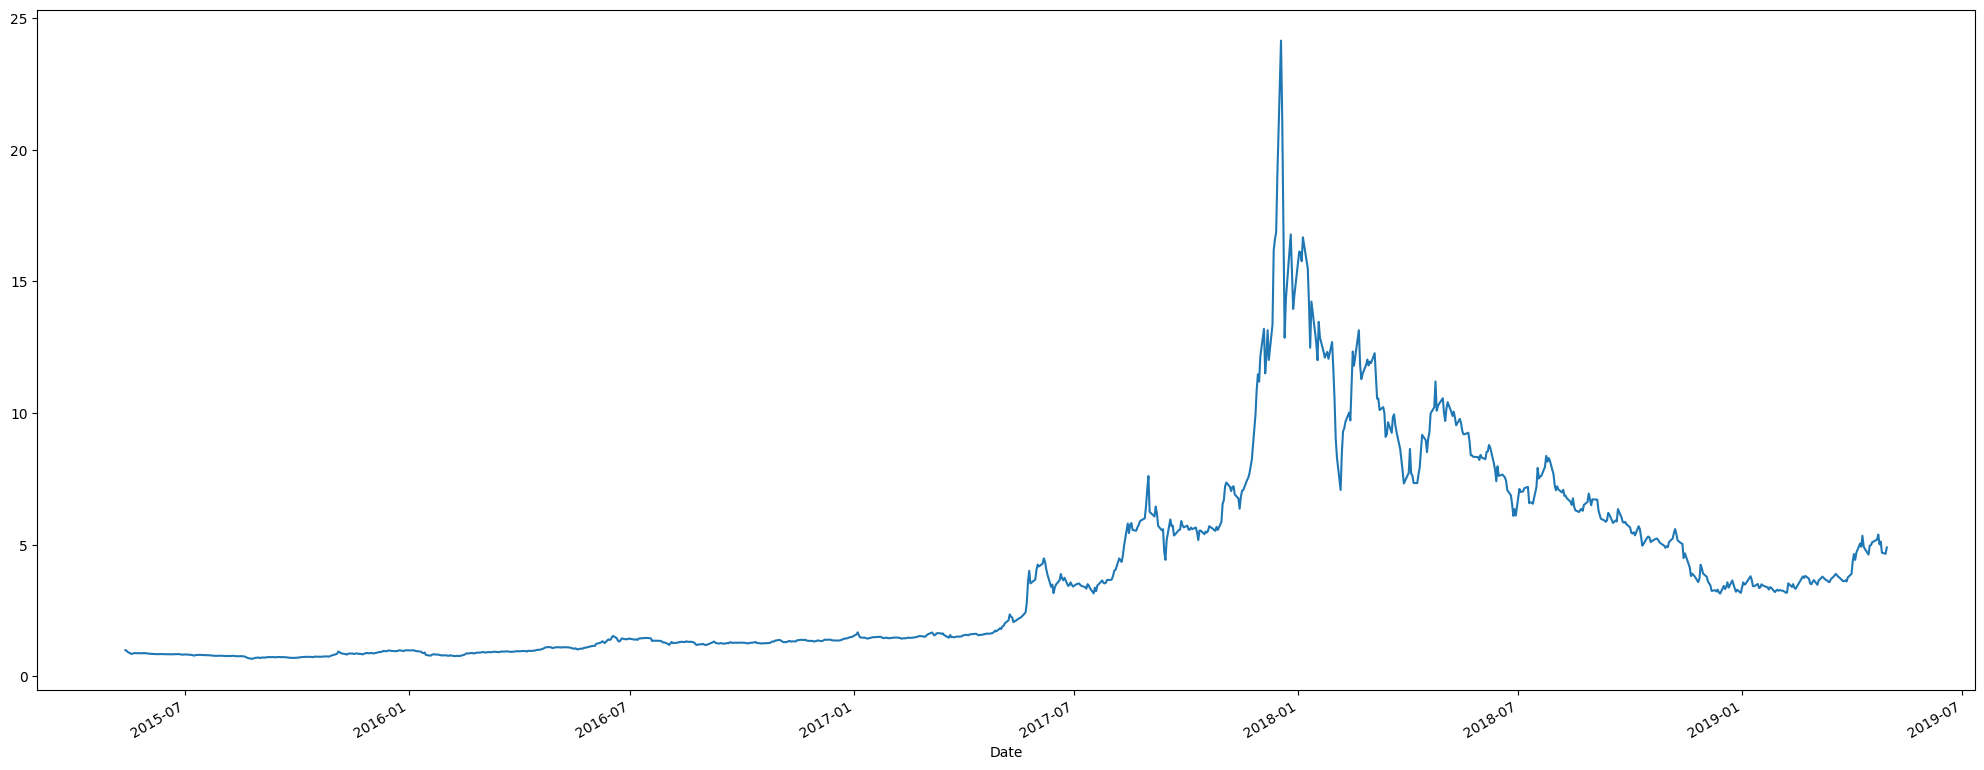

In [157]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return 
etfchange2 = etfchange1.dot(weights)
etfchange2.plot(figsize=(25,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [159]:
# Join your returns DataFrame to the original returns DataFrame # Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio = etfchange.dot(weights)
bothdf = pd.concat([fulldf, portfolio], axis="columns", join="inner").dropna()
bothdf

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,0
Date,,,,,,,,
2015-05-13,-0.010664,0.000395,0.001439,0.000000,0.000000,0.000000,0.000000,-0.004377
2015-05-14,-0.000768,0.004243,0.006485,0.000000,0.000000,0.000000,0.000000,-0.024135
2015-05-15,-0.003039,0.001845,0.002393,0.003392,0.000347,0.002330,0.005032,-0.052162
2015-05-18,0.000644,-0.007829,0.002922,0.001025,0.004321,0.002333,0.002300,-0.094565
2015-05-19,0.000931,-0.000050,-0.003203,-0.001099,-0.000594,0.002078,-0.000825,0.019903
...,...,...,...,...,...,...,...,...
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492,-0.018656
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.034710
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,0.004621


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [160]:
# Calculate the annualized `std`
bothstddf = bothdf.std()*100
bothstddf

S&P 500                        0.864068
Algo 1                         0.769380
Algo 2                         0.844608
SOROS FUND MANAGEMENT LLC      0.800770
PAULSON & CO.INC.              0.713245
TIGER GLOBAL MANAGEMENT LLC    1.109439
BERKSHIRE HATHAWAY INC         1.315519
0                              2.228800
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

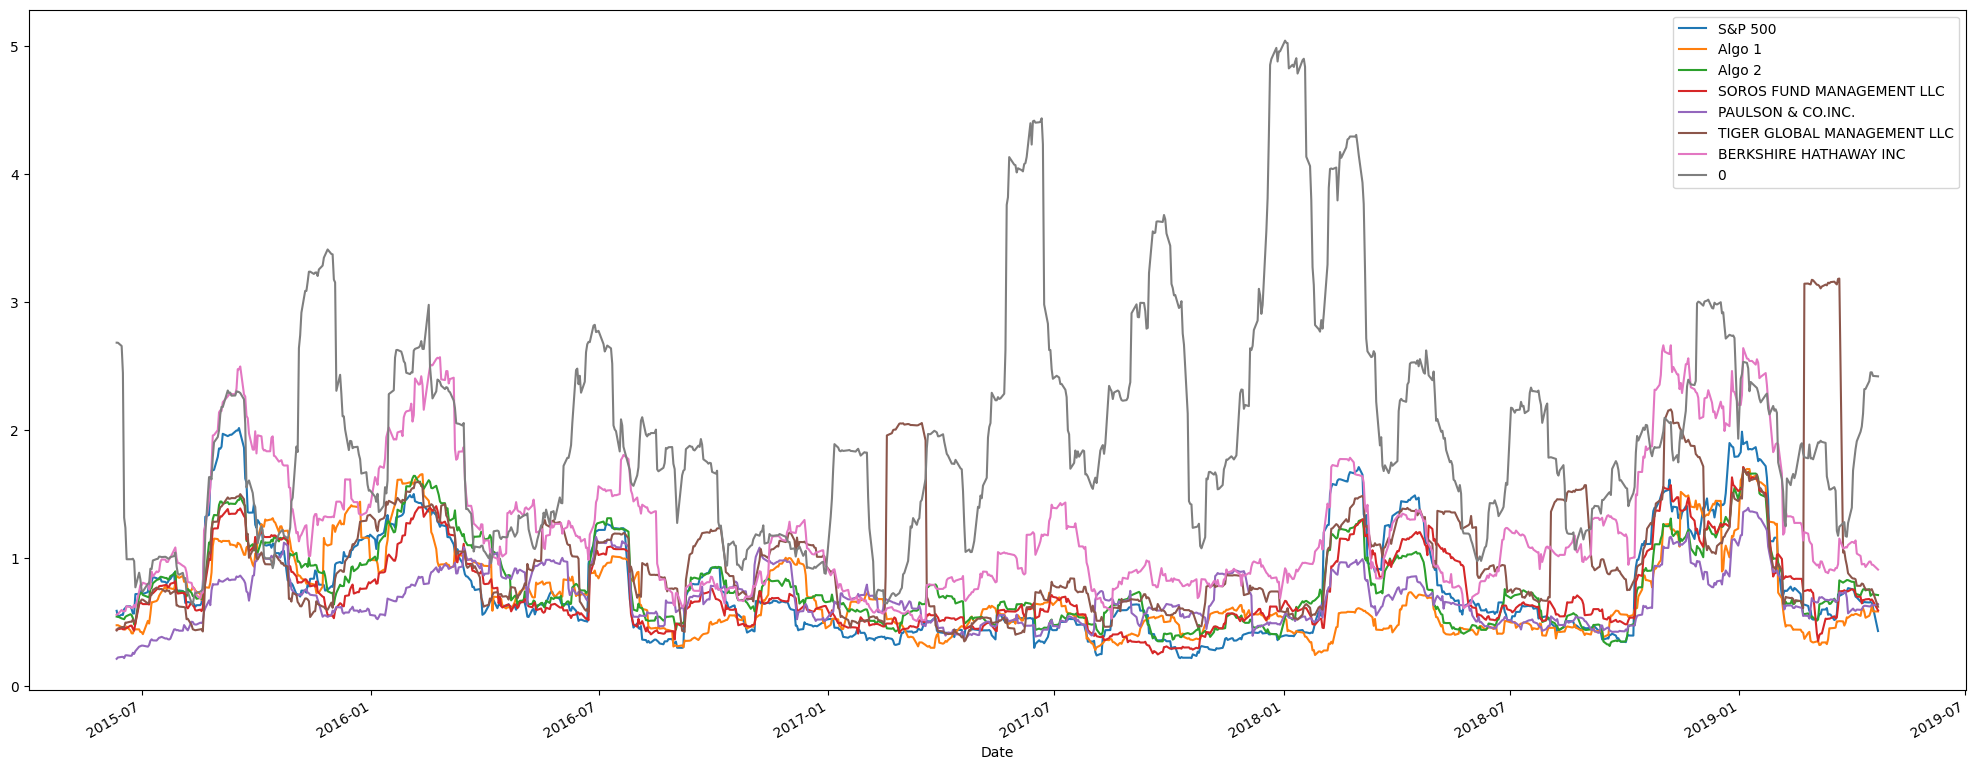

In [161]:
# Calculate rolling standard deviation
bothrolldf = bothdf.rolling(21).std()*100
# Plot rolling standard deviation
bothrolldf.plot(figsize=(25,10))

### Calculate and plot the correlation

<Axes: >

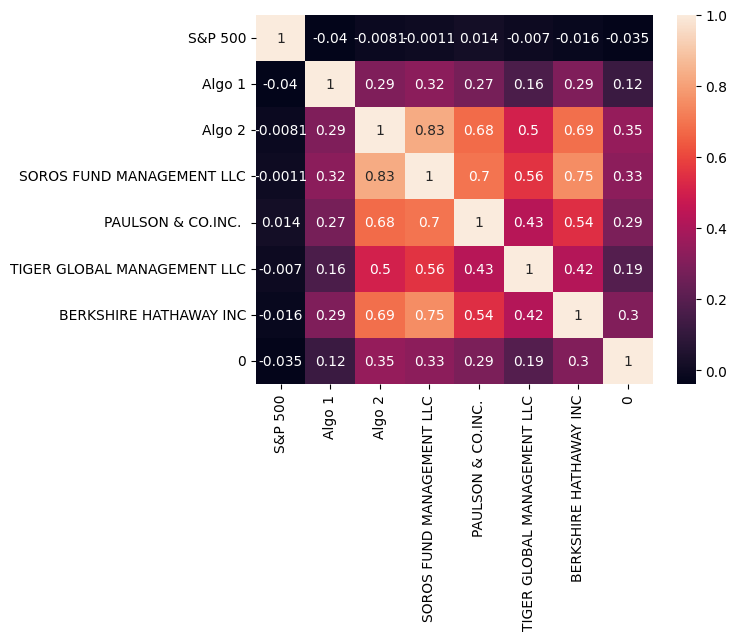

In [167]:
# Calculate and plot the correlation
bothcorr = bothdf.corr()
seaborn.heatmap(bothcorr, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: >

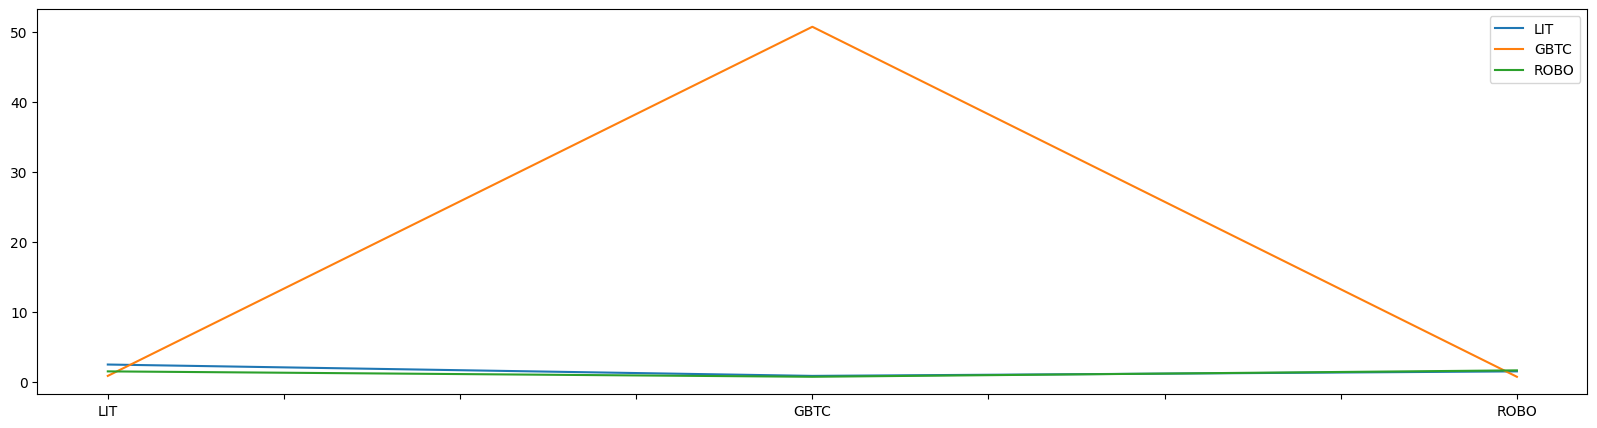

In [176]:
# Calculate and plot Beta
portfoliocov = etfchange.cov()
#vardf = fulldf["S&P 500"].var()
# Computing beta
beta1 = portfoliocov/vardf
# Plot beta trend
beta1.plot(figsize=(20,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [170]:
# Calculate Annualized Sharpe Ratios
rate = np.average([2.14, 1.84, 2.33, 2.91, 2.14])/100 # yearly averages of 10-year Treasury bonds from 2015-2019 via https://www.macrotrends.net/2016/10-year-treasury-bond-rate-yield-chart
ratios1 = pd.DataFrame(columns=["Sharpe Ratios"])
for x in etfchange:
    std = etfchange[x].std()* np.sqrt(252) # annualized volatility
    returns = etfchange[x].mean()* 252 # annualized excpected returns
    ratio = (returns-rate)/std # Sharpe ratio
    ratios1.loc[x] = ratio
ratios1

,Sharpe Ratios
LIT,0.098568
GBTC,1.100413
ROBO,0.613002


<Axes: >

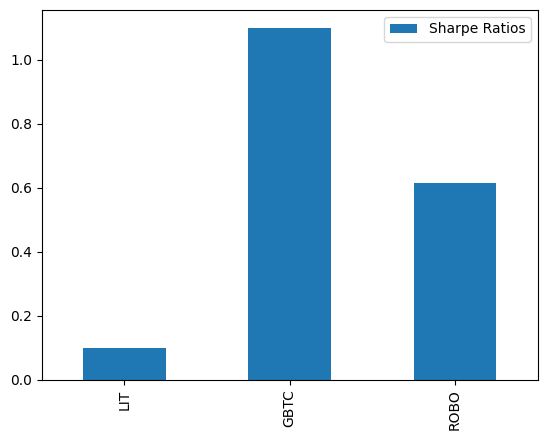

In [171]:
# Visualize the sharpe ratios as a bar plot
ratios1.plot(kind="bar")

In [177]:
bothdf1 = (1+bothdf).cumprod()

### How does your portfolio do?

My portfolio did fairly well, mainly due to the Bitcoin boom in late 2017. While it did come back down pretty far in 2018, these new technologies were a great investment compared to the rest of the market. 

<Axes: xlabel='Date'>

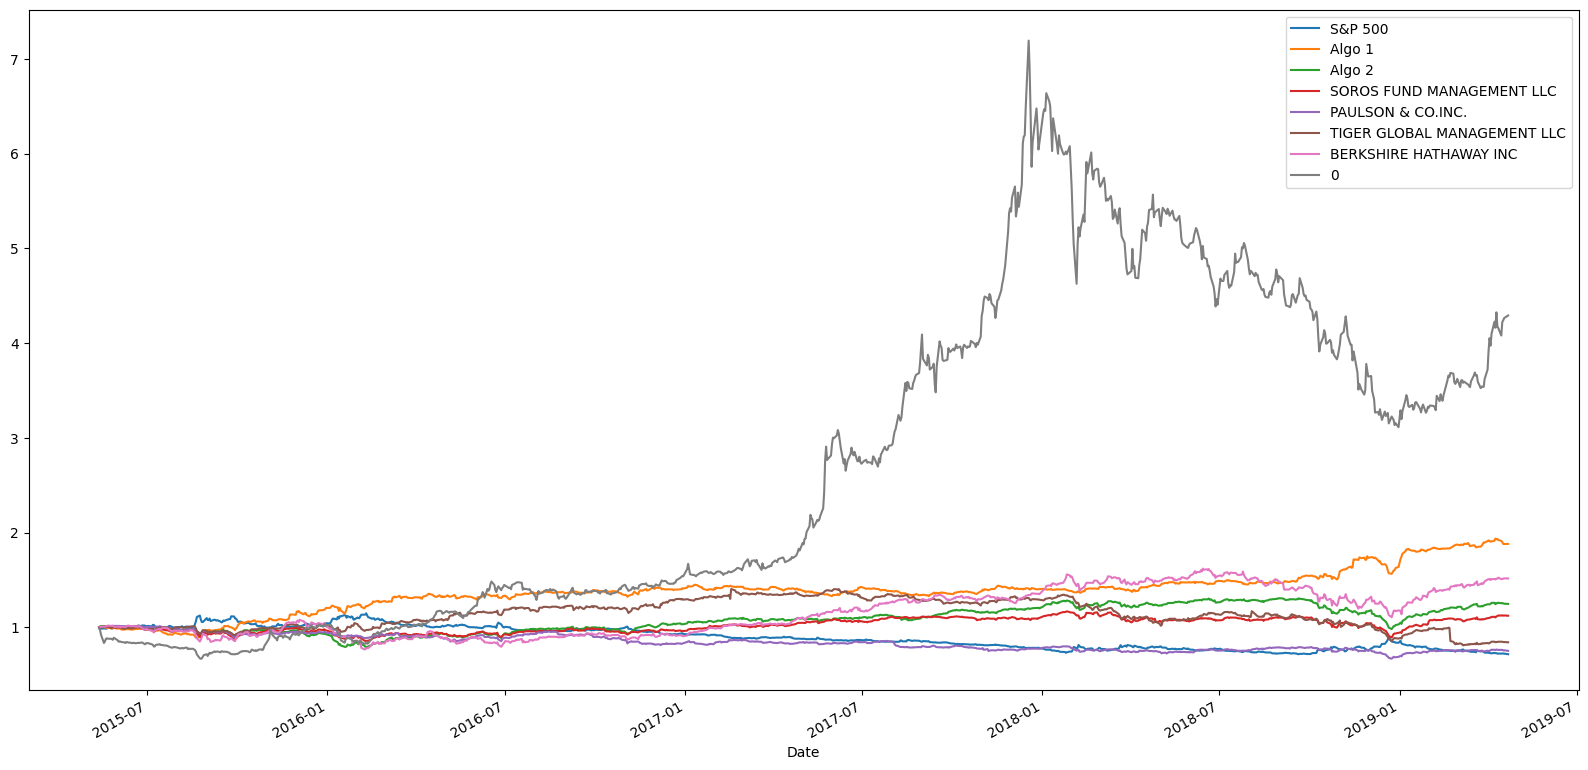

In [178]:
bothdf1.plot(figsize=(20,10))